In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
# from keras.layers import merge, Input
from keras.models import Model
from keras.utils import to_categorical
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Capstone')

In [ ]:
training_data = ('/content/drive/MyDrive/Capstone/training')
testing_data = ('/content/drive/MyDrive/Capstone/testing')

In [ ]:
#Bunga Lawang
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Bunga Lawang')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cengkeh
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Cengkeh')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Jahe
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Jahe')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kayu Manis
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kayu Manis')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kemiri
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kemiri')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kencur
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kencur')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Ketumbar
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Ketumbar')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kunyit
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kunyit')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Lengkuas
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Lengkuas')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Pala
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Pala')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
train_dir = Path('/content/drive/MyDrive/Capstone/training')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels
filepaths = list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.JPG')) + list(train_dir.glob(r'**/*.jpeg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
train_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
train_df = train_df.sample(frac=1).reset_index(drop = True)

# Show the result
train_df.head(15)

,Filepath,Label
0,/content/drive/MyDrive/Capstone/training/Lengk...,Lengkuas
1,/content/drive/MyDrive/Capstone/training/Pala/...,Pala
2,/content/drive/MyDrive/Capstone/training/Lengk...,Lengkuas
3,/content/drive/MyDrive/Capstone/training/Bunga...,Bunga Lawang
4,/content/drive/MyDrive/Capstone/training/Bunga...,Bunga Lawang
5,/content/drive/MyDrive/Capstone/training/Jahe/...,Jahe
6,/content/drive/MyDrive/Capstone/training/Ketum...,Ketumbar
7,/content/drive/MyDrive/Capstone/training/Bunga...,Bunga Lawang
8,/content/drive/MyDrive/Capstone/training/Kayu ...,Kayu Manis
9,/content/drive/MyDrive/Capstone/training/Cengk...,Cengkeh


In [ ]:
#cek label
from pathlib import Path
test_dir = Path('/content/drive/MyDrive/Capstone/testing')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels data testing
filepaths_test = list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.JPG')) + list(test_dir.glob(r'**/*.jpeg'))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_test))

In [ ]:
import pandas as pd
filepaths3 = pd.Series(filepaths_test, name='Filepath').astype(str)
labels3 = pd.Series(labels_test, name='Label')

# Concatenate filepaths and labels
test_df = pd.concat([filepaths3, labels3], axis=1)

# Shuffle the DataFrame and reset index
test_df = test_df.sample(frac=1).reset_index(drop = True)

# Show the result
test_df.head(15)

,Filepath,Label
0,/content/drive/MyDrive/Capstone/testing/Kayu M...,Kayu Manis
1,/content/drive/MyDrive/Capstone/testing/Kencur...,Kencur
2,/content/drive/MyDrive/Capstone/testing/Kencur...,Kencur
3,/content/drive/MyDrive/Capstone/testing/Cengke...,Cengkeh
4,/content/drive/MyDrive/Capstone/testing/Kencur...,Kencur
5,/content/drive/MyDrive/Capstone/testing/Kencur...,Kencur
6,/content/drive/MyDrive/Capstone/testing/Kencur...,Kencur
7,/content/drive/MyDrive/Capstone/testing/Ketumb...,Ketumbar
8,/content/drive/MyDrive/Capstone/testing/Bunga ...,Bunga Lawang
9,/content/drive/MyDrive/Capstone/testing/Kunyit...,Kunyit


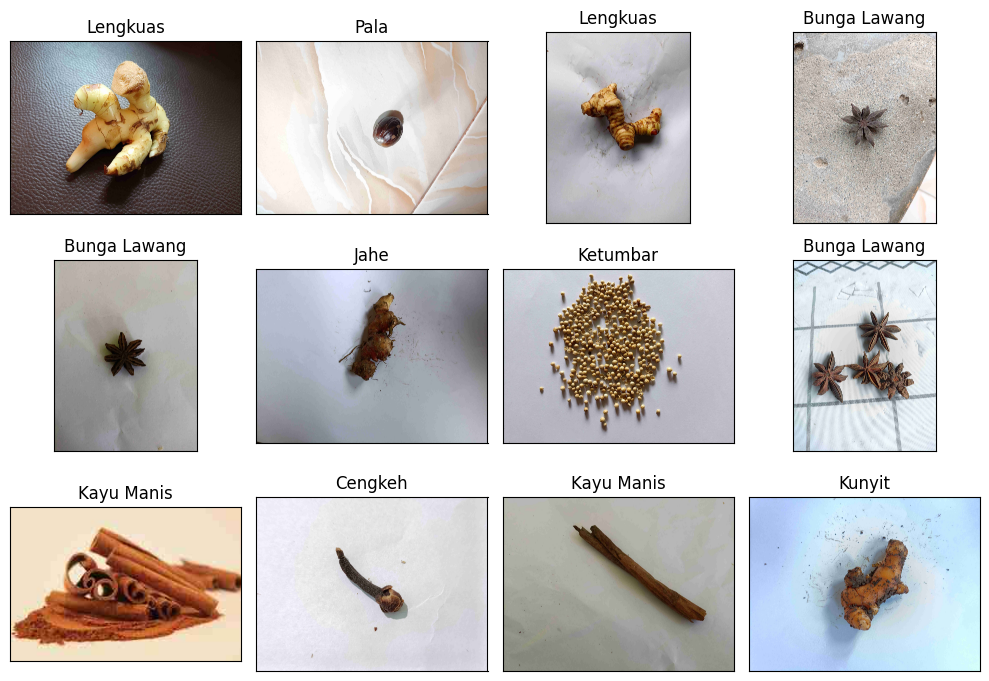

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i])
plt.tight_layout()
plt.show()

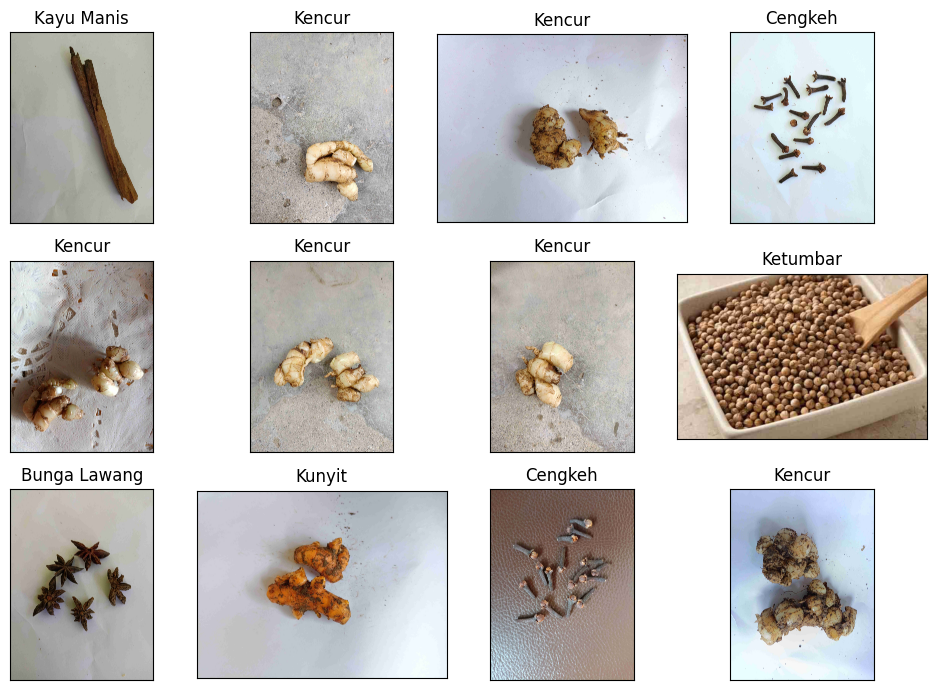

In [ ]:
# Menampilkan beberapa contoh dataset dari directory testing
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath[i]))
    ax.set_title(test_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-21-67f49b6db74c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


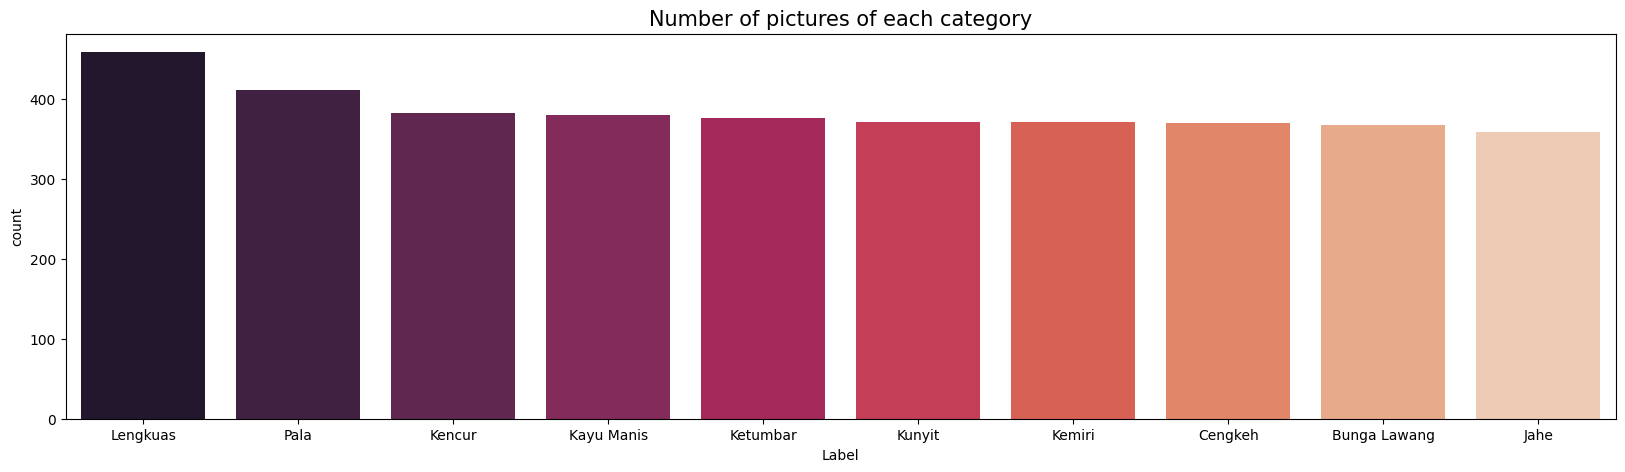

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-22-321982c41b0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


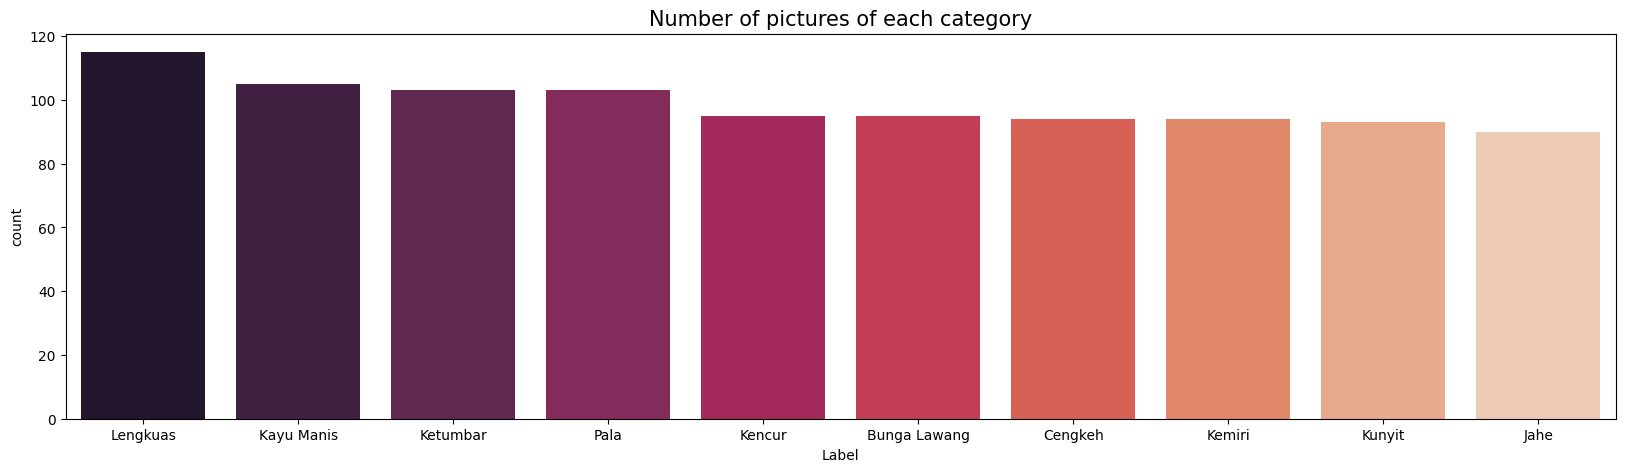

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = test_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                         )

test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3850 validated image filenames belonging to 10 classes.
Found 987 validated image filenames belonging to 10 classes.


In [ ]:
import tensorflow as tf
from keras import Model, Input
# Tentukan input shape yang sesuai untuk model VGG16
input_shape = (224, 224, 3)  # Sesuaikan dengan ukuran gambar yang Anda gunakan
model_input = tf.keras.Input(shape=input_shape)
batch_size=32

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Gunakan pre-trained VGG16 tanpa bagian fully connected (include_top=False)
base_model = VGG16(weights="imagenet", include_top=False, input_tensor=model_input)

# Bekukan semua layer base_model
base_model.trainable = False

# Buat model lengkap dengan menambahkan lapisan-lapisan berikut
VGG16_model = tf.keras.models.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

#Kompilasi Model
optimizer = Adamax(learning_rate=0.0001)
VGG16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27565386 (105.15 MB)
Trainable params: 12850698 (49.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import os
import tensorflow as tf

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

logs_dir = '/content/logs/'
if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

# Membuat objek TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir, histogram_freq=1)

In [ ]:
# Jika menggunakan Python, Anda bisa mencoba hal berikut untuk membersihkan cache
import os
import sys

# Hapus file bytecode (.pyc) yang mungkin sudah tidak valid
pyc_files = [f for f in os.listdir() if f.endswith('.pyc')]
for pyc_file in pyc_files:
    os.remove(pyc_file)

# Hapus modul TensorFlow dari cache
module_name = 'tensorflow'  # Sesuaikan dengan nama modul TensorFlow Anda
if module_name in sys.modules:
    del sys.modules[module_name]

In [ ]:
import os
import pickle
from tensorflow.keras.callbacks import Callback

class HistorySaverCallback(Callback):
    def __init__(self, modelname, history_dir):
        super().__init__()
        self.modelname = modelname
        self.history_dir = history_dir

        # Membuat direktori history jika belum ada
        if not os.path.exists(history_dir):
            os.mkdir(history_dir)

    def on_epoch_end(self, epoch, logs=None):
        # Menyimpan history setiap epoch
        file_path = os.path.join(self.history_dir, f"{self.modelname}_vgg16.{epoch:02d}.pkl")
        with open(file_path, 'wb') as file_pi:
            pickle.dump(self.model.history.history, file_pi)

In [ ]:
history_dir = '/content/drive/MyDrive/Capstone/coba/VGG16/Adam'
modelname = "vgg16"

In [ ]:
save_history_callback = HistorySaverCallback(modelname, history_dir)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Capstone/coba/VGG16/Adam/VGG16.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=2)  # Menampilkan pesan saat menyimpan

In [ ]:
callbacks= [checkpoint_callback, tensorboard_callback, save_history_callback]
vgg16_history = VGG16_model.fit(
                  train_data,
                  validation_data=test_data,
                  steps_per_epoch=train_data.n/batch_size,
                  validation_steps=test_data.n/batch_size,
                  epochs=10,
                  callbacks=callbacks)

Epoch 1/10
121/120 [==============================] - ETA: -14s - loss: 1.1811 - accuracy: 0.6296
Epoch 1: loss improved from inf to 1.18112, saving model to /content/drive/MyDrive/Capstone/coba/VGG16/Adam/VGG16.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 3226s 27s/step - loss: 1.1811 - accuracy: 0.6296 - val_loss: 0.5454 - val_accuracy: 0.8501
Epoch 2/10
121/120 [==============================] - ETA: -14s - loss: 0.6360 - accuracy: 0.7990
Epoch 2: loss improved from 1.18112 to 0.63597, saving model to /content/drive/MyDrive/Capstone/coba/VGG16/Adam/VGG16.h5
120/120 [==============================] - 3130s 26s/step - loss: 0.6360 - accuracy: 0.7990 - val_loss: 0.3805 - val_accuracy: 0.8977
Epoch 3/10
121/120 [==============================] - ETA: -14s - loss: 0.5097 - accuracy: 0.8494
Epoch 3: loss improved from 0.63597 to 0.50971, saving model to /content/drive/MyDrive/Capstone/coba/VGG16/Adam/VGG16.h5
120/120 [==============================] - 3119s 26s/step - loss: 0.5097 - accuracy: 0.8494 - val_loss: 0.3164 - val_accuracy: 0.9108
Epoch 4/10
121/120 [==============================] - ETA: -14s - loss: 0.4360 - accuracy: 0.8657
Epoch 4: loss improved from 0.50971 to 0.43597, saving model t

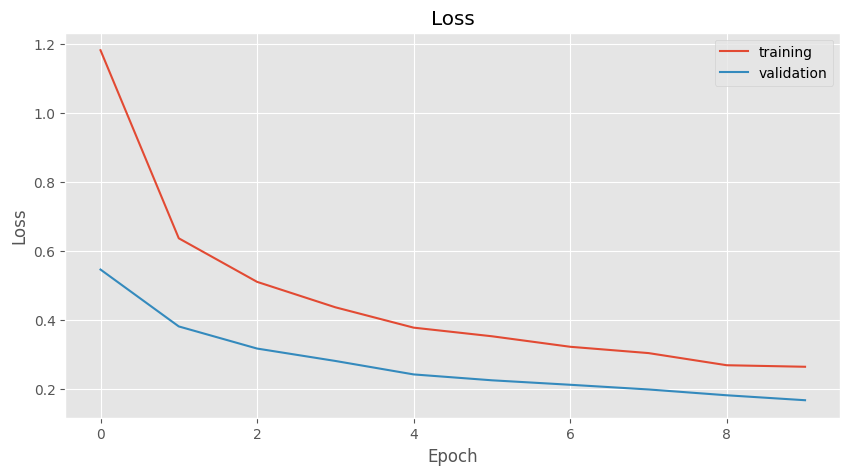

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10), vgg16_history.history["loss"], label="training")
plt.plot(np.arange(0, 10), vgg16_history.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

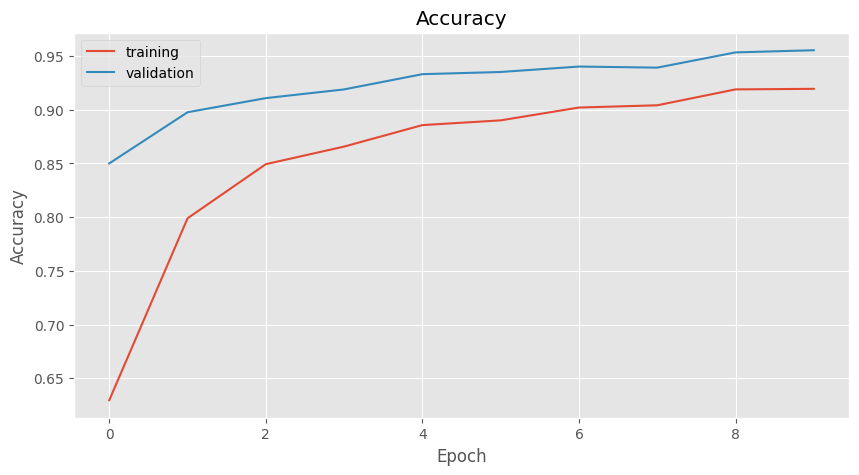

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10), vgg16_history.history["accuracy"], label="training")
plt.plot(np.arange(0, 10), vgg16_history.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
VGG16_model.save('/content/drive/MyDrive/Capstone/coba/VGG16/VGG16(1).h5')
print("Model saved.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved.


In [ ]:
# Predict the label of the test_images
import numpy as np
pred_test = VGG16_model.predict(test_data)
pred_test = np.argmax(pred_test,axis=1)

# Map the label
labels = (test_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_test = [labels[k] for k in pred_test]

# Display the result
print(f'The first 5 predictions: {pred_test[:4]}')

31/31 [==============================] - 631s 20s/step
The first 5 predictions: ['Kayu Manis', 'Kencur', 'Kencur', 'Cengkeh']


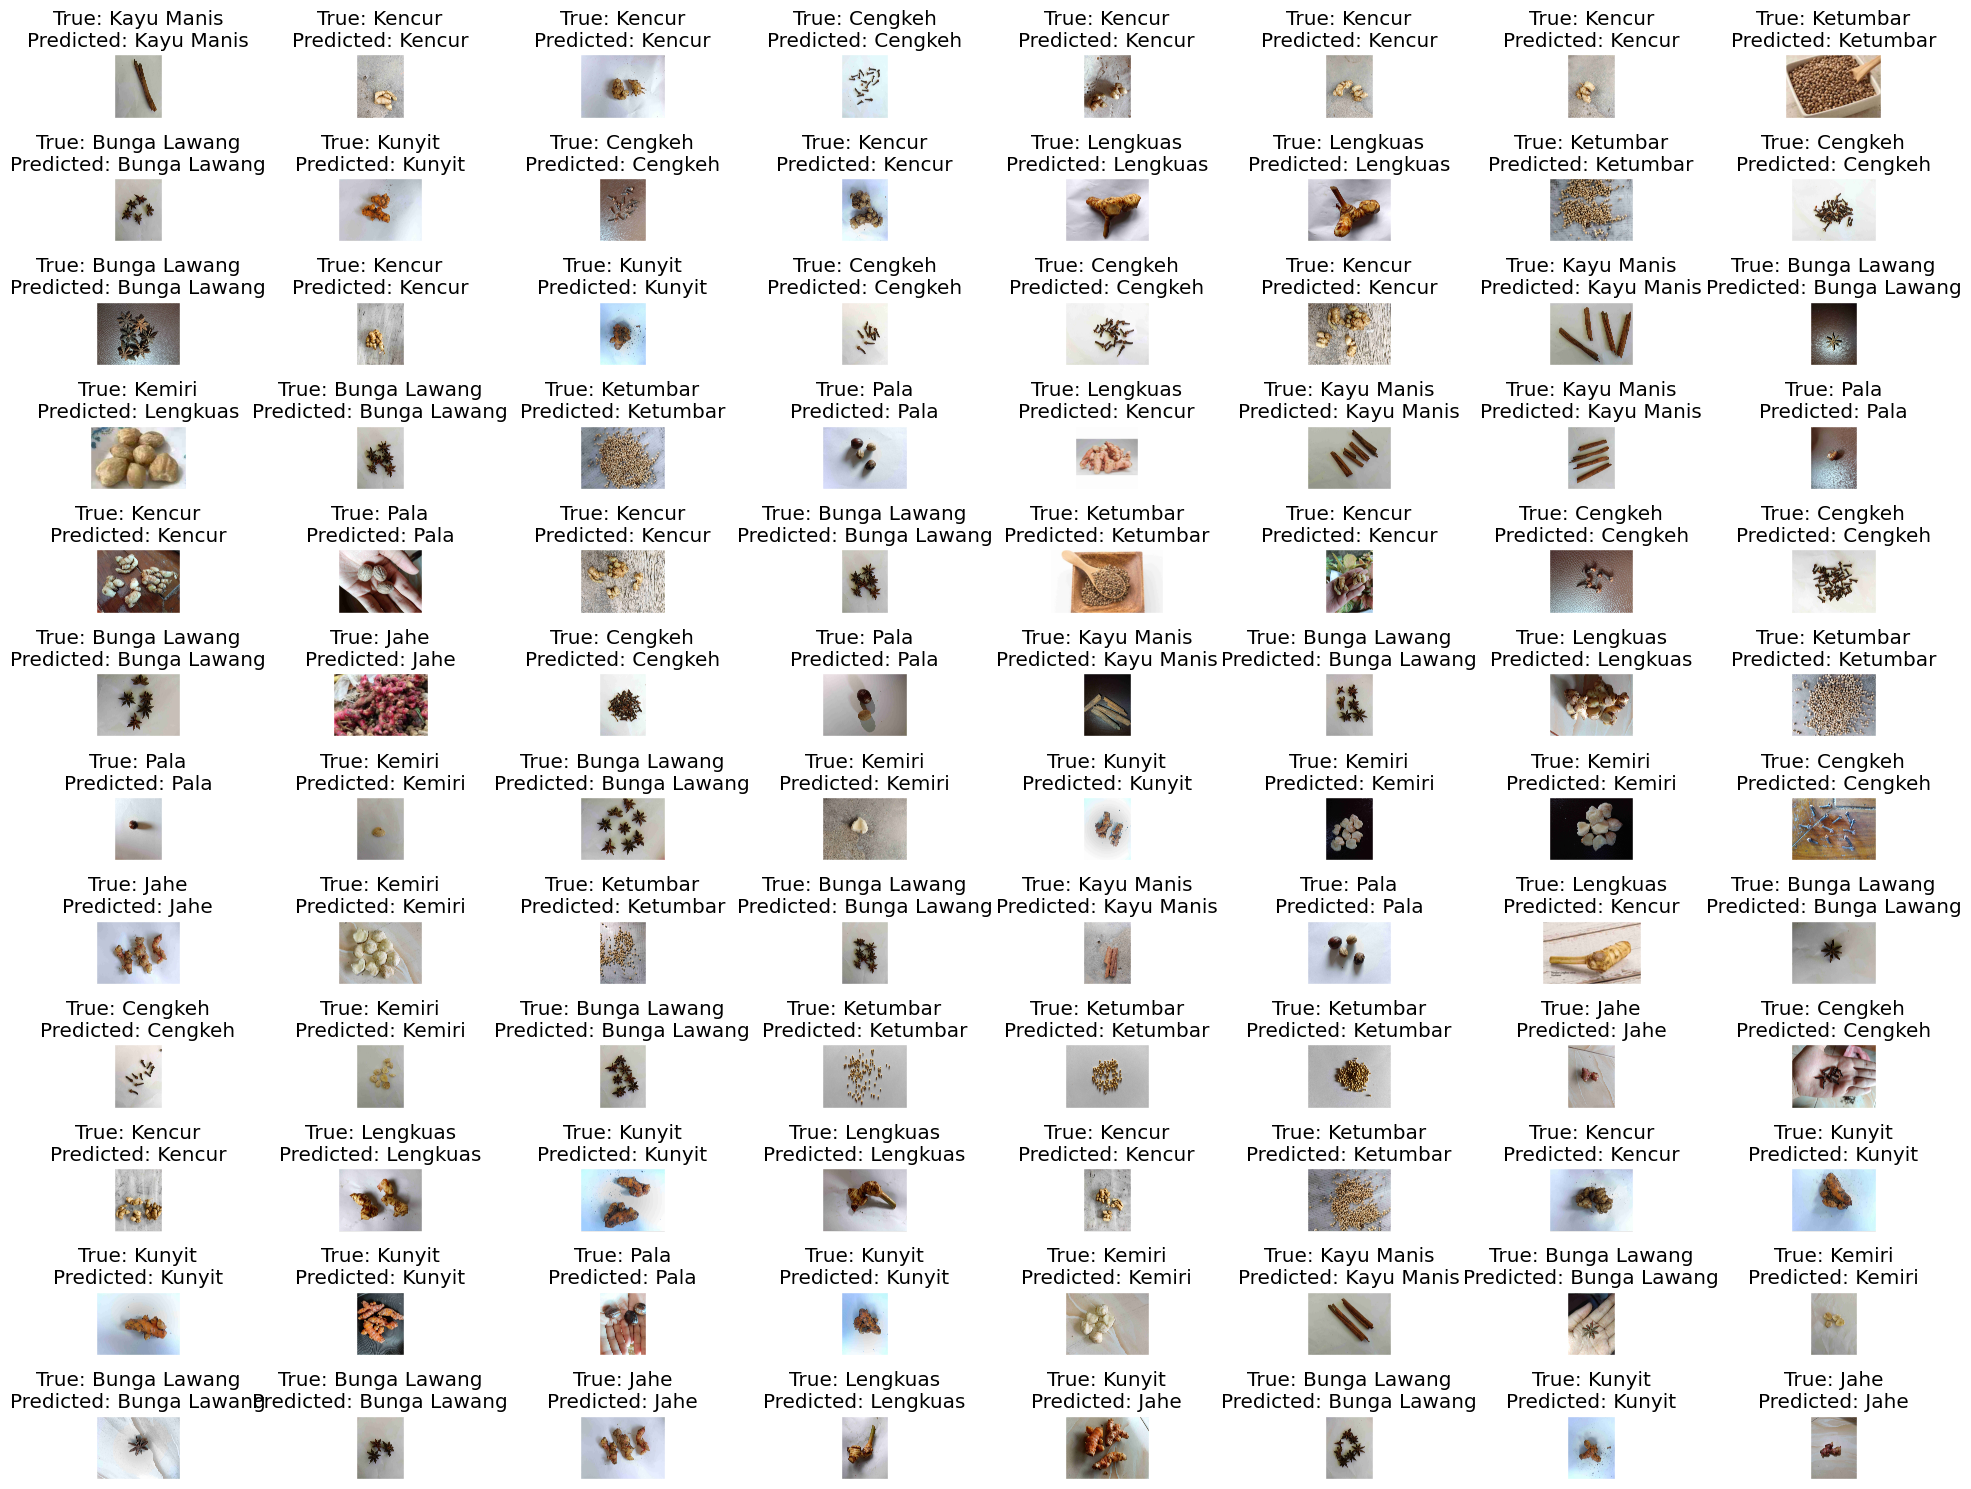

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=12, ncols=8, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred_test[i]}")
plt.tight_layout()
plt.show()

Saving WhatsApp Image 2024-05-26 at 11.04.20_ebcf8a40.jpg to WhatsApp Image 2024-05-26 at 11.04.20_ebcf8a40.jpg
1/1 [==============================] - 0s 487ms/step
WhatsApp Image 2024-05-26 at 11.04.20_ebcf8a40.jpg
This image belongs to class Pala


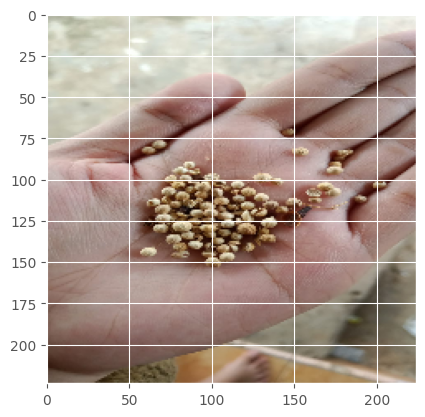

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os
import matplotlib.pyplot as plt


uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image (if your model expects normalized input)

    images = np.vstack([x])
    classes = VGG16_model.predict(images, batch_size=10)

    print(fn)

    class_list = os.listdir(train_dir)
    num_classes = len(class_list)  # Determine the number of classes

    # Find the index of the maximum value in the predictions
    predicted_class_index = np.argmax(classes[0])

    # Print the predicted class
    if predicted_class_index < num_classes:
        print('This image belongs to class', class_list[predicted_class_index])
    else:
        print('Predicted class index is out of bounds:', predicted_class_index)
